In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from math import sqrt

In [2]:
df = pd.read_csv("../CSV's/FinalDataSet.csv")

In [3]:
print(df.shape)
df.head()

(8801, 36)


,Prix,Type De Bien,Surface,Nombre De Pièces,Nombre De Chambres,Nombre De Salles De Bain,Etat De Location,Étage,Jardin,Terrasse,...,Ville_agadir,Ville_bouskoura,Ville_casablanca,Ville_dar-bouazza,Ville_kénitra,Ville_marrakech,Ville_mohammedia,Ville_rabat,Ville_salé,Ville_tanger
0,4800.0,1,75.0,1.0,2.0,2.0,2.0,2,0,0,...,1,0,0,0,0,0,0,0,0,0
1,600.0,1,111.0,2.0,2.0,2.0,2.0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2,4000.0,1,75.0,1.0,2.0,2.0,2.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4000.0,1,65.0,1.0,1.0,1.0,2.0,6,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4700.0,1,85.0,3.0,2.0,1.0,2.0,6,0,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
# Dataframe without target variable:
X = df.drop(columns = ["Prix"])
# Target variable:
y = df['Prix']
# Splitting the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)


### ElasticNet

Note that we tried to scaled the data before applying the ElasticNet model.

In [5]:
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Define the grid of values for α and l1_ratio
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
l1_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Initialize the ElasticNetCV model
model_ElasticNetCV = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=10)

# Fit the model to the scaled training data
model_ElasticNetCV.fit(X_train_scaled, y_train)

# The optimal values of α and l1_ratio are stored in `alpha_` and `l1_ratio_` attributes of the model
optimal_alpha = model_ElasticNetCV.alpha_
optimal_l1_ratio = model_ElasticNetCV.l1_ratio_


In [6]:
print(optimal_alpha)
print(optimal_l1_ratio)

0.1
0.2


In [7]:
model_ElasticNet = ElasticNet(alpha=0.1, l1_ratio=0.2)

# Perform 10-fold cross-validation on the scaled training data
scores = cross_val_score(model_ElasticNet, X_train_scaled, y_train, cv=10)

# Calculate the average R² score
avg_r2_ElasticNet = scores.mean()

# Generate cross-validated predictions on the scaled training data
cv_predictions_ElasticNet = cross_val_predict(model_ElasticNet, X_train_scaled, y_train, cv=10)


In [10]:
cv_predictions_ElasticNet

(6600,)

In [8]:

#Validation:
cv_rmse_ElasticNet = np.sqrt(mean_squared_error(y_train, cv_predictions_ElasticNet))

# Training:
model_ElasticNet.fit(X_train, y_train)
y_train_pred = model_ElasticNet.predict(X_train)
r2_training_ElasticNet = r2_score(y_train, y_train_pred)
train_rmse_ElasticNet = sqrt(mean_squared_error(y_train, y_train_pred))

#____test_____
y_test_pred_ElasticNet = model_ElasticNet.predict(X_test)
r2_test_ElasticNet = r2_score(y_test,y_test_pred_ElasticNet)
test_rmse_ElasticNet = sqrt(mean_squared_error(y_test, y_test_pred_ElasticNet))

In [9]:
print(f'Validation R² for ElasticNet: {avg_r2_ElasticNet:.2f}')
print(f'Validation RMSE for ElasticNet: {cv_rmse_ElasticNet:.2f}')
print("________________________")
print(f'Training R² for ElasticNet: {r2_training_ElasticNet:.2f}')
print(f'Training RMSE for ElasticNet: {train_rmse_ElasticNet:.2f}')
print("________________________")
print(f'Test R² for ElasticNet: {r2_test_ElasticNet:.2f}')
print(f'Test RMSE for ElasticNet: {test_rmse_ElasticNet:.2f}')



Validation R² for ElasticNet: 0.54
Validation RMSE for ElasticNet: 3021.80
________________________
Training R² for ElasticNet: 0.53
Training RMSE for ElasticNet: 3064.53
________________________
Test R² for ElasticNet: 0.54
Test RMSE for ElasticNet: 3037.70


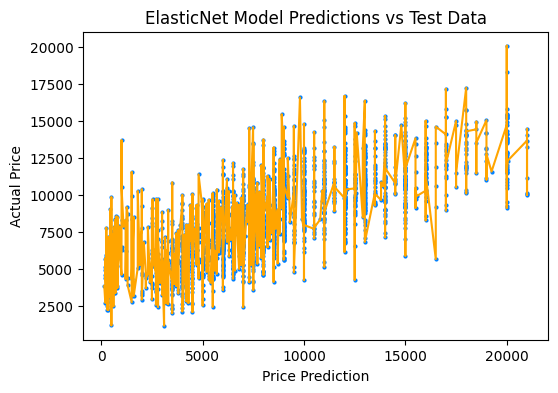

In [10]:
# Convert to numpy arrays for easy sorting
y_test_np = np.array(y_test)
y_test_pred_np = np.array(y_test_pred_ElasticNet)

# Get the sorted order of y_test
sort_order = np.argsort(y_test_np)

# Apply the sort order to both y_test and y_test_pred
y_test_sorted = y_test_np[sort_order]
y_test_pred_sorted = y_test_pred_np[sort_order]

plt.figure(figsize=(6,4))
plt.scatter(y_test_sorted, y_test_pred_sorted, color='#0080ff', s=4) 
plt.plot(y_test_sorted, y_test_pred_sorted, color='orange')
plt.title('ElasticNet Model Predictions vs Test Data')
plt.ylabel('Actual Price')
plt.xlabel('Price Prediction')
plt.show()


### Decision Tree Regression

In [11]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'max_depth': [ 10, 20, 30, 40],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create a GridSearchCV object
# grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, refit=True, verbose=2, cv=10)

# # Fit the model to the data
# grid.fit(X_train, y_train)

# # Print the best parameters
# print(grid.best_params_)




We use the cross-validation technique for hyperparameter tuning and model selection in this Decision Tree Regressor model by using GridSearchCV from Scikit-Learn.

In [12]:
modelDTR = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 4, min_samples_split = 10, random_state=44)


In [13]:
# Calculate the Validation R² and rmse score
scores = cross_val_score(modelDTR, X_train, y_train, cv=10)
avg_r2_tree = scores.mean()
cv_predictions_tree = cross_val_predict(modelDTR, X_train, y_train, cv=10)
cv_rmse_tree = np.sqrt(mean_squared_error(y_train, cv_predictions_tree))
# Calculate the training R² and rmse
modelDTR.fit(X_train, y_train)
y_train_pred_tree = modelDTR.predict(X_train)
r2_training_tree = r2_score(y_train, y_train_pred_tree)
y_train_pred_tree  = modelDTR.predict(X_train)
train_rmse_tree = sqrt(mean_squared_error(y_train, y_train_pred_tree))
# Calculate the test R² and rmse:
test_predictions = modelDTR.predict(X_test)
test_r2_tree = r2_score(y_test, test_predictions)
test_rmse3_tree = sqrt(mean_squared_error(y_test, test_predictions))


In [14]:
print(f'Validation R² for Decision Tree Regression: {avg_r2_tree:.2f}')
print(f'Validation RMSE for Decision Tree Regression : {cv_rmse_tree:.2f}')
print("___________________________________")
print(f'Training R² for Decision Tree Regression: {r2_training_tree:.2f}')
print(f'Training RMSE for Decision Tree Regression: {train_rmse_tree:.2f}')
print("___________________________________")
print(f'Test R² for Decision Tree Regression: {test_r2_tree:.2f}')
print(f'Test RMSE for Decision Tree Regression: {test_rmse3_tree:.2f}')


Validation R² for Decision Tree Regression: 0.55
Validation RMSE for Decision Tree Regression : 2974.93
___________________________________
Training R² for Decision Tree Regression: 0.74
Training RMSE for Decision Tree Regression: 2249.14
___________________________________
Test R² for Decision Tree Regression: 0.58
Test RMSE for Decision Tree Regression: 2908.13


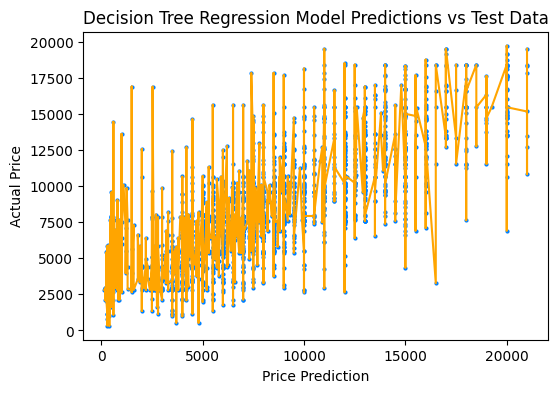

In [15]:
y_test_pred_np = np.array(test_predictions)

# Apply the sort order to both y_test and y_test_pred
y_test_sorted1 = y_test_np[sort_order]
y_test_pred_sorted1 = y_test_pred_np[sort_order]

plt.figure(figsize=(6,4))
plt.scatter(y_test_sorted1, y_test_pred_sorted1, color='#0080ff', s=4) 
plt.plot(y_test_sorted1, y_test_pred_sorted1, color='orange')
plt.title('Decision Tree Regression Model Predictions vs Test Data')
plt.ylabel('Actual Price')
plt.xlabel('Price Prediction')
plt.show()


### Random Forest Regression

In [16]:
# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200 ],
#     'max_depth': [None, 10, 20, 40],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 4]
# }

# # Create a GridSearchCV object
# grid = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, refit=True, verbose=2, cv=10)

# # Fit the model to the data
# grid.fit(X_train, y_train)

# # Print the best parameters
# print(grid.best_params_)

# # Fit the model with the best parameters to the training data
# model = RandomForestRegressor(random_state=0, **grid.best_params_)


We do the same thing for Random Forest Regression so that we can pick the best model which is the model with the following parameters : max_depth=20, min_samples_split=5, n_estimators=200

In [17]:
modelRFR = RandomForestRegressor(max_depth=None, min_samples_split=5, min_samples_leaf=1, n_estimators=200,random_state=0)

In [18]:
# Calculate the Validation R² and rmse score
scores = cross_val_score(modelRFR, X_train, y_train, cv=10)
avg_r2_rfr = scores.mean()
cv_predictions = cross_val_predict(modelRFR, X_train, y_train, cv=10)
cv_rmse_rfr = np.sqrt(mean_squared_error(y_train, cv_predictions))
# Calculate the training R² and rmse
modelRFR.fit(X_train, y_train)
y_train_pred_rfr = modelRFR.predict(X_train)
r2_training_rfr = r2_score(y_train, y_train_pred_rfr)
y_train_pred_rfr = modelRFR.predict(X_train)
train_rmse_rfr = sqrt(mean_squared_error(y_train, y_train_pred_rfr))

# Calculate the test R² and rmse:
test_predictions2 = modelRFR.predict(X_test)
test_r2_rfr = r2_score(y_test, test_predictions2)
test_rmse_rfr = sqrt(mean_squared_error(y_test, test_predictions2))


In [19]:
print(f'Validation R² for Random Forest Regression: {avg_r2_rfr:.2f}')
print(f'Validation RMSE for Random Forest Regression : {cv_rmse_rfr:.2f}')
print("___________________________________")
print(f'Training R² for Random Forest Regression: {r2_training_rfr:.2f}')
print(f'Training RMSE for Random Forest Regression: {train_rmse_rfr:.2f}')
print("___________________________________")
print(f'Test R² for Random Forest Regression: {test_r2_rfr:.2f}')
print(f'Test RMSE for Random Forest Regression: {test_rmse_rfr:.2f}')


Validation R² for Random Forest Regression: 0.67
Validation RMSE for Random Forest Regression : 2555.18
___________________________________
Training R² for Random Forest Regression: 0.92
Training RMSE for Random Forest Regression: 1234.75
___________________________________
Test R² for Random Forest Regression: 0.70
Test RMSE for Random Forest Regression: 2462.22


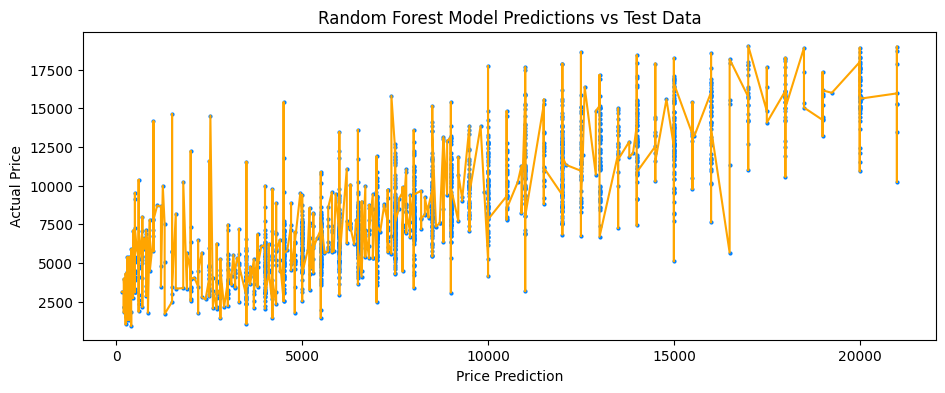

In [20]:
y_test_pred_np2  = np.array(test_predictions2)
# Apply the sort order to both y_test and y_test_pred
y_test_sorted2 = y_test_np[sort_order]
y_test_pred_sorted2 = y_test_pred_np2[sort_order]

plt.figure(figsize=(11,4))
plt.scatter(y_test_sorted2, y_test_pred_sorted2, color='#0080ff', s=4) 
plt.plot(y_test_sorted2, y_test_pred_sorted2, color='orange')
plt.title('Random Forest Model Predictions vs Test Data')
plt.ylabel('Actual Price')
plt.xlabel('Price Prediction')
plt.savefig("model.png")
plt.show()


### Gradient Boosting Regression

In [21]:
# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300, 400],
#     'learning_rate': [0.1, 0.05, 0.02, 0.01],
#     'max_depth': [4, 6],
#     'min_samples_leaf': [3, 5, 9, 17],
#     'max_features': [1.0, 0.3, 0.1]
# }

# # Create a GridSearchCV object
# grid = GridSearchCV(GradientBoostingRegressor(random_state=0), param_grid, cv=10, n_jobs=-1)

# # Fit the model to the data
# grid.fit(X_train, y_train)

# # Print the best parameters
# print(grid.best_params_)


In [22]:
modelGB = GradientBoostingRegressor(learning_rate=  0.05, max_depth = 6, max_features= 0.1, min_samples_leaf = 5, n_estimators = 400,random_state=0)
modelGB.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.05, max_depth=6, max_features=0.1,
                          min_samples_leaf=5, n_estimators=400, random_state=0)

In [23]:
# Calculate the Validation R² and rmse score
scores = cross_val_score(modelGB, X_train, y_train, cv=10)
avg_r2_gb = scores.mean()
cv_predictions = cross_val_predict(modelGB, X_train, y_train, cv=10)
cv_rmse_gb = np.sqrt(mean_squared_error(y_train, cv_predictions))
# Calculate the training R² and rmse
y_train_pred_gb= modelGB.predict(X_train)
r2_training_gb = r2_score(y_train, y_train_pred_gb)
y_train_pred_gb = modelGB.predict(X_train)
train_rmse_gb = sqrt(mean_squared_error(y_train, y_train_pred_gb))
# Calculate the test R² and rmse:
test_predictions = modelGB.predict(X_test)
test_r2_gb = r2_score(y_test, test_predictions)
test_rmse_gb = sqrt(mean_squared_error(y_test, test_predictions))
    

In [24]:
print(f'Validation R² for Gradient Boosting: {avg_r2_gb:.2f}')
print(f'Validation RMSE for Gradient Boosting : {cv_rmse_gb:.2f}')
print("___________________________________")
print(f'Training R² for Gradient Boosting: {r2_training_gb:.2f}')
print(f'Training RMSE for Gradient Boosting: {train_rmse_gb:.2f}')
print("___________________________________")
print(f'Test R² for Decision Gradient Boosting: {test_r2_gb:.2f}')
print(f'Test RMSE for Decision Gradient Boosting: {test_rmse_gb:.2f}')


Validation R² for Gradient Boosting: 0.70
Validation RMSE for Gradient Boosting : 2429.88
___________________________________
Training R² for Gradient Boosting: 0.80
Training RMSE for Gradient Boosting: 1968.61
___________________________________
Test R² for Decision Gradient Boosting: 0.72
Test RMSE for Decision Gradient Boosting: 2381.24


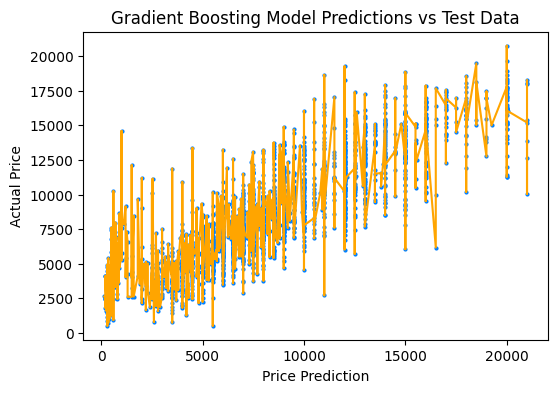

In [25]:
y_test_pred_np3  = np.array(test_predictions)

# Get the sorted order of y_test
sort_order = np.argsort(y_test_np)

# Apply the sort order to both y_test and y_test_pred
y_test_sorted3 = y_test_np[sort_order]
y_test_pred_sorted3 = y_test_pred_np3[sort_order]

plt.figure(figsize=(6,4))
plt.scatter(y_test_sorted3, y_test_pred_sorted3, color='#0080ff', s=4) 
plt.plot(y_test_sorted3, y_test_pred_sorted3, color='orange')
plt.title('Gradient Boosting Model Predictions vs Test Data')
plt.ylabel('Actual Price')
plt.xlabel('Price Prediction')
plt.show()


### Comparaison & Discussion

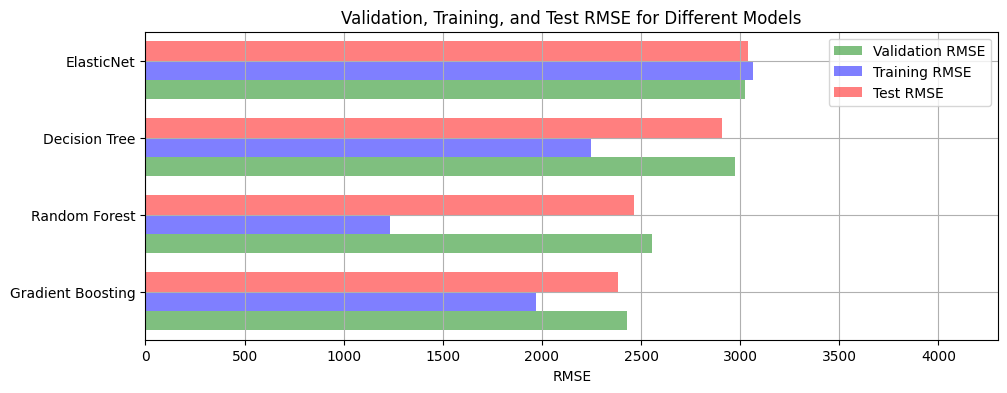

In [26]:
# Assuming the R² values are as follows:
validation_rmse_values = [ cv_rmse_gb, cv_rmse_rfr, cv_rmse_tree, cv_rmse_ElasticNet]
training_rmse_values = [ train_rmse_gb, train_rmse_rfr, train_rmse_tree, train_rmse_ElasticNet]
test_rmse_values = [ test_rmse_gb, test_rmse_rfr, test_rmse3_tree, test_rmse_ElasticNet]
models = [ 'Gradient Boosting', 'Random Forest', 'Decision Tree', "ElasticNet"]

# Setting the positions and width for the bars
pos = list(range(len(models))) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(11,4))

# Create a horizontal bar with validation_r2 data,
# in position pos,
plt.barh(pos, 
        validation_rmse_values, 
        width, 
        alpha=0.5, 
        color='green', 
        label='Validation RMSE') 

# Create a horizontal bar with training_r2 data,
# in position pos + some width buffer,
plt.barh([p + width for p in pos], 
        training_rmse_values, 
        width, 
        alpha=0.5, 
        color='blue', 
        label='Training RMSE') 

# Create a horizontal bar with test_r2 data,
# in position pos + 2*width buffer,
plt.barh([p + 2*width for p in pos], 
        test_rmse_values, 
        width, 
        alpha=0.5, 
        color='red', 
        label='Test RMSE') 

# Set the x axis label
ax.set_xlabel('RMSE')

# Set the chart's title
ax.set_title('Validation, Training, and Test RMSE for Different Models')

# Set the position of the y ticks
ax.set_yticks([p + 1.5 * width for p in pos])

# Set the labels for the y ticks
ax.set_yticklabels(models)

# Setting the x-axis and y-axis limits
plt.ylim(min(pos)-width, max(pos)+width*3)
plt.xlim([0, 4300])  # Set the limits of the x-axis here

# Adding the legend and showing the plot
plt.legend(loc='upper right')
plt.grid()
plt.savefig('output1.png')

plt.show()


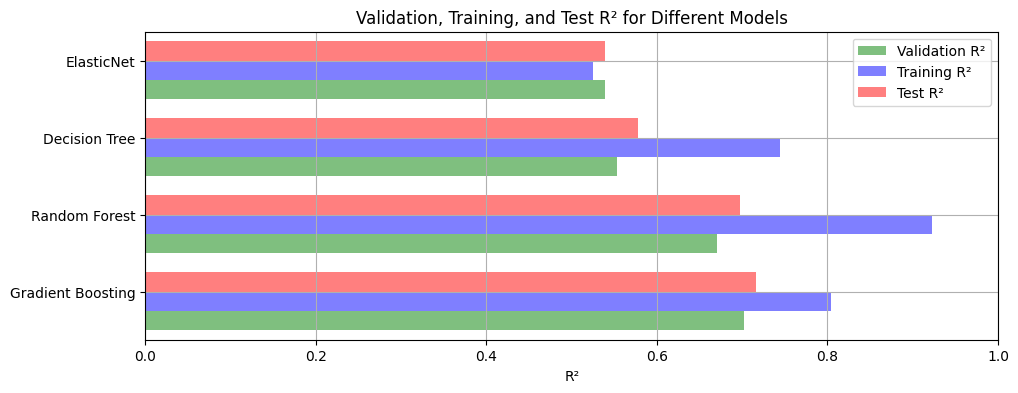

In [27]:
# Assuming the R² values are as follows:
validation_r2_values = [ avg_r2_gb, avg_r2_rfr, avg_r2_tree, avg_r2_ElasticNet]
training_r2_values = [ r2_training_gb, r2_training_rfr, r2_training_tree, r2_training_ElasticNet]
test_r2_values = [ test_r2_gb, test_r2_rfr, test_r2_tree, r2_test_ElasticNet]
models = [ 'Gradient Boosting', 'Random Forest', 'Decision Tree', "ElasticNet"]

# Setting the positions and width for the bars
pos = list(range(len(models))) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(11,4))

# Create a horizontal bar with validation_r2 data,
# in position pos,
plt.barh(pos, 
        validation_r2_values, 
        width, 
        alpha=0.5, 
        color='green', 
        label='Validation R²') 

# Create a horizontal bar with training_r2 data,
# in position pos + some width buffer,
plt.barh([p + width for p in pos], 
        training_r2_values, 
        width, 
        alpha=0.5, 
        color='blue', 
        label='Training R²') 

# Create a horizontal bar with test_r2 data,
# in position pos + 2*width buffer,
plt.barh([p + 2*width for p in pos], 
        test_r2_values, 
        width, 
        alpha=0.5, 
        color='red', 
        label='Test R²') 

# Set the x axis label
ax.set_xlabel('R²')

# Set the chart's title
ax.set_title('Validation, Training, and Test R² for Different Models')

# Set the position of the y ticks
ax.set_yticks([p + 1.5 * width for p in pos])

# Set the labels for the y ticks
ax.set_yticklabels(models)

# Setting the x-axis and y-axis limits
plt.ylim(min(pos)-width, max(pos)+width*3)
plt.xlim([0, 1])  # Set the limits of the x-axis here

# Adding the legend and showing the plot
plt.legend(loc='upper right')
plt.grid()
plt.savefig('output2.png')
plt.show()


In [28]:
print(models)
print("validation_r2", validation_r2_values)
print("training_r2", training_r2_values)
print("test_r2", test_r2_values)
print("validation_rms", validation_rmse_values)
print("training_rmse", training_rmse_values)
print("test_rmse", test_rmse_values)

['Gradient Boosting', 'Random Forest', 'Decision Tree', 'ElasticNet']
validation_r2 [0.7020401326074783, 0.6702304999384288, 0.5531747689604576, 0.5393478452662062]
training_r2 [0.8041230248480353, 0.9229410141829623, 0.7443187580951527, 0.5253283643393885]
test_r2 [0.7165452506998451, 0.6969378825418353, 0.5772287582157016, 0.5387164416394183]
validation_rms [2429.8841114940324, 2555.184061711954, 2974.928477865759, 3021.802024205315]
training_rmse [1968.6085073081636, 1234.7507756273121, 2249.1431454466424, 3064.5330091272326]
test_rmse [2381.2400985886297, 2462.2216450540122, 2908.131475848299, 3037.702969924977]


### Make a predcition using RFR Model

In [29]:
X_train.columns

Index(['Type De Bien', 'Surface', 'Nombre De Pièces', 'Nombre De Chambres',
       'Nombre De Salles De Bain', 'Etat De Location', 'Étage', 'Jardin',
       'Terrasse', 'Garage', 'Ascenseur', 'Piscine', 'Concierge', 'Meublé',
       'Salon Marocain', 'Salon européen', 'Climatisation', 'Sécurité',
       'Cuisine équipée', 'Réfrigérateur', 'Four', 'TV', 'Micro-ondes',
       'Animaux domestiques autorisés', 'Cheminée', 'Ville_agadir',
       'Ville_bouskoura', 'Ville_casablanca', 'Ville_dar-bouazza',
       'Ville_kénitra', 'Ville_marrakech', 'Ville_mohammedia', 'Ville_rabat',
       'Ville_salé', 'Ville_tanger'],
      dtype='object')

In [30]:
X_train.head(2)

,Type De Bien,Surface,Nombre De Pièces,Nombre De Chambres,Nombre De Salles De Bain,Etat De Location,Étage,Jardin,Terrasse,Garage,...,Ville_agadir,Ville_bouskoura,Ville_casablanca,Ville_dar-bouazza,Ville_kénitra,Ville_marrakech,Ville_mohammedia,Ville_rabat,Ville_salé,Ville_tanger
6144,1,80.0,3.0,2.0,2.0,1.0,6,1,1,1,...,0,0,0,0,0,1,0,0,0,0
5641,1,100.0,3.0,2.0,2.0,1.0,5,0,1,1,...,0,0,0,0,0,1,0,0,0,0


In [31]:
record = [0,120.0, 4, 2,2, 2, 4,0,0, 0,0,1,1, 0,1, 0, 1, 0, 0, 1,0, 0,1, 0, 0,0, 0,0, 0,0, 1,0,0, 0,0 ]
record = np.array(record).reshape(1, -1)

record_prediction = modelRFR.predict(record)

print(f"The Price for this example is {record_prediction[0]:.2f} DHs")


The Price for this example is 7239.79 DHs


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
